# Math 856 - Homework 4

Alex Beckwith

Ch. 9 | Problems 1, 3, 5, 8, 17

In [9]:
# standard library imports
from math import sqrt

# third party imports
from matplotlib.pyplot import plot, hist, xlabel, ylabel, title
from numpy import linspace
from scipy.stats import norm, poisson

# local imports
from Math855.src.prob_dist import binom, binom_dist

# 1
A coin is thrown independently $10$ times to test the hypothesis that the probability of heads is $1/2$ versus the alternative that the probability is not $1/2$ . The test rejects if either $0$ or $10$ heads are observed.

1a. What is the significance level of the test?

P(Type I Error) = $α$

P(Type I Error) = P($X = 0 | H_{0}$) + P($X = 10 | H_{0}$)

In [10]:
x0_h0 = binom(10, 0, 0.5)
x10_h0 = binom(10, 10, 0.5)
α = x0_h0 + x10_h0

print(f"1a | The significance level of the test is {α}")

1a | The significance level of the test is 0.001953125


1b. If in fact the probability of heads is $.1$, what is the power of the test?

In [11]:
x0_h1 = binom(10, 0, 0.1)
x10_h1 = binom(10, 10, 0.1)
βconv = x0_h1 + x10_h1

print(f"1b | The power of the test is {round(βconv, 8)}")

1b | The power of the test is 0.34867844


# 3

Suppose that $X \sim bin(100, p)$. 

Consider the test that rejects $H_{0}$: $p = .5$ in favor of $H_{A}$: $p ≠ .5$ for $|X − 50| > 10$. 

Use the normal approximation to the binomial distribution to answer the following:

3a. What is $α$?

3b. Graph the power as a function of $p$.

$$α = P(|X - 50| > 10)
$$
$$α = P(X < 40) + P(X > 60)
$$

In [12]:
n, p, q = 100, 0.5, 0.5
dist = binom_dist(n, p)

alpha_range = [i for i in dist["x"] if (i < 40 or i > 60)]
alpha_probs = [dist["prob"][i] for i in alpha_range]
alpha = sum(alpha_probs)
print(f"3a | α = {round(alpha, 8)}")

3a | α = 0.0352002


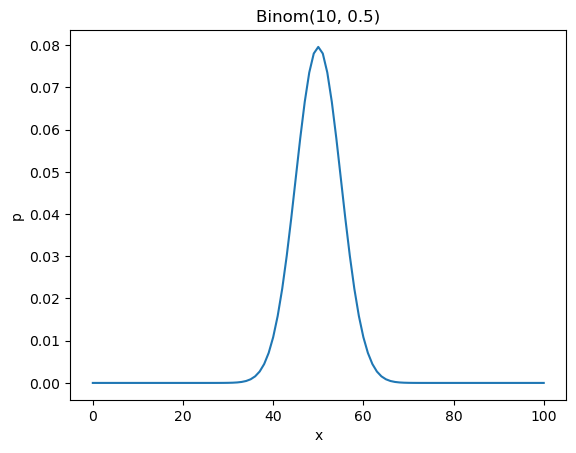

In [13]:
binomx = dist["x"]
binomp = dist["prob"]

xlabel("x")
ylabel("p")
title("Binom(10, 0.5)")
binom_dist_plot = plot(binomx, binomp)

In [14]:
xmin, xmax = 0, 100
μ = n * p
mu = lambda n, p: n * p
var = lambda n, p: n * p * (1 - p)
α2 = n * p * q
rv = norm(loc=μ, scale=α2)

In [15]:
def type2(p: float, n: int = 100, lbound: int = 40, ubound: int = 60):
    mean = mu(n, p)
    stddev = sqrt(var(n, p))
    zlow = (lbound - mean) / stddev
    zupp = (ubound - mean) / stddev
    inner_p = norm.cdf(zupp) - norm.cdf(zlow)
    return 1 - inner_p

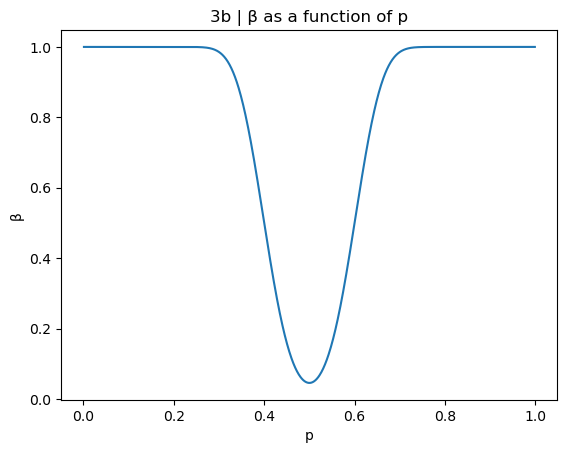

In [16]:
x = linspace(0.001, 0.999, 998)
y = [type2(z) for z in x]
xlabel("p")
ylabel("β")
title("3b | β as a function of p")
plot(x, y)

# 5
True or false, and state why:

5a. The significance level of a statistical test is equal to the probability that the null hypothesis is true.

$False$ The significance level of a test is equal to the conditional probability of rejecting the null hypothesis when the null hypothesis is true. 

5b. If the significance level of a test is decreased,the power would be expected to increase.

$False$. Decreasing the significance level of a test decreases the likelihood that the null hypothesis will be rejected. Since the  power of a test is 1 - the probability of rejecting the null hypothesis under alternative conditions, the power of the test would also be expected to decrease.

c. If a test is rejected at the significance level α, the probability that the null hypothesis is true equals α.

$False$. The signficance level of a test is not the probability that the null hypothesis is true, but a threshold for an estimate of the condition probabilty that the null hypothesis is rejected while being true. 

d. The probability that the null hypothesisis falsely rejected is equal to the power of the test.

$False$. The power of the test is the probability that the null hypothesis is correctly rejected.

e. A type I error occurs when the test statistic falls in the rejection region of the test.

$False$. When the the test statistic falls in the rejection region of the test, the rejection may be correct. The type I error would occur if the rejection were an incorrect representation of the underlying data.

f. A type II error is more serious than a type I error. 

$False$. Both errors are serious. One may choose to bias the likelihood of one error type in favor of the other depending on the problem at hand.

g. The power of a test is determined by the null distribution of the test statistic.

$False$. The power of a test is the probability of correctly rejecting the null hypothesis when the alternative is true. The function can be computed for every distribution in the alternative hypothesis. 

h. The likelihood ratio is a random variable.

$True$. The likelihood ratio is the ratio of the conditional pmf/pdf of the data under the null and alternative hypotheses, which itself is a random variable. 

# 7
Let $X_{1}$, $...$, $X_{n}$ be a sample from a Poisson distribution.F ind the likelihood ratio for testing $H_{0}$: $λ = λ_{0}$ versus $H_{A}: λ = λ_{1}$, where $λ_{1} > λ_{0}$. Use the fact that the sum of independent Poisson random variables follows a Poisson distribution to explain how to determine a rejection region for a test at level $α$.
# 8
Show that the test of Problem 7 is uniformly most powerful for testing $H_{0}: λ = λ_{0}$ versus $H_{A}: λ > λ_{0}$.

Reject $H_{0}$ iff $$\frac {l(\lambda_{0})}{l(\lambda_{1})} < c $$

The two likelihood functions
$$
l(\lambda_{0}) = \prod_{i = 1}^{n} e^{\lambda_{0}}\lambda_{0}^{X_{i}} / X_{i}!
$$
$$
l(\lambda_{1}) = \prod_{i = 1}^{n} e^{\lambda_{1}}\lambda_{1}^{X_{i}} / X_{i}!
$$

Expand cumulative products and simplify
$$ \frac
{e^{-n\lambda_{0}}\lambda_{0}^{\sum_{i=1}^{n}X_{i}}}
{e^{-n\lambda_{1}}\lambda_{1}^{\sum_{i=1}^{n}X_{i}}}
< c
$$

Simplify exponetial and lambda terms, multiplying exponential terms across
$$
{\lambda_{0}/\lambda_{1}}^{\sum_{i=1}^{n}X_{i}}
<
e^{n(\lambda_{0}-\lambda_{1})}c
$$

Take log of both sides
$$
\sum_{i=1}^{n}X_{i}log(\lambda_{0}/\lambda_{1}) < n(\lambda_{0}-\lambda_{1}) + log(c)
$$

If $\lambda_{0} < \lambda_{1}$, $log(\frac{\lambda_{0}}{\lambda_{1}}) < 0$

Therefore, flip sign when dividing
$$
\sum_{i=1}^{n}X_{i} > [n(\lambda_{0}-\lambda_{1}) + log(c)] / log(\lambda_{0}/\lambda_{1})
$$
And so
$$
c_{1} = [n(\lambda_{0}-\lambda_{1}) + log(c)] / log(\lambda_{0}/\lambda_{1})
$$

The smallest value of $c_{1}$ for which the test will have at most $\alpha$ is the upper $\alpha$ quantile of the Poisson($n\lambda_{0}$) distribution 
$$
P_{\lambda=\lambda_{0}}(\sum_{i=1}^{n}X_{i} > c_{1}) = P(Y > c_{1}), Y \sim \mathrm{Poisson}(n\lambda_{0})
$$

The power function does not depend on $λ > λ_{0}$, and is therefore uniformly most powerful for the test of $H_{0}: λ = λ_{0}$ versus $H_{A}: λ > λ_{0}$

# 17
Let $X \sim N(0, σ_{2})$, and consider testing $H_{0}: σ_{1} = σ_{0}$ versus $H_{A}: σ = σ_{1}$, where $σ_{1} > σ_{0}$. The values $σ_{0}$ and $σ_{1}$ are fixed.

17a. What is the likelihood ratio as a function of $x$? What values favor $H_{0}$? What is the rejection region of a level $α$ test?

The likelihood ratio:
$$
L(x) 
= \frac{l_{0}(x)}{l_{1}(x)} 
= \frac
{\frac{1}{\sigma_{0}\sqrt{2\pi}}
 {\sf exp}\left[\frac{-x^{2}}{2\sigma_{0}^{2}}\right]}
{\frac{1}{\sigma_{1}\sqrt{2\pi}}
 {\sf exp}\left[\frac{-x^{2}}{2\sigma_{1}^{2}}\right]}
$$




Simplify:
$$
L(x) 
= \frac{\sigma_{0}}{\sigma_{1}}
{\sf exp}\left[
\frac{x^{2}}{2}
\left(\frac{1}{\sigma_{1}^{2}} - 
\frac{1}{\sigma_{0}^{2}}\right)
\right]
$$

To find values favoring $H_{0}$, we'd be looking for ratios greater than some $c$:

$$\frac{\sigma_{0}}{\sigma_{1}}
{\sf exp}\left[
\frac{x^{2}}{2}
\left(\frac{1}{\sigma_{1}^{2}} - 
\frac{1}{\sigma_{0}^{2}}\right)
\right]
> c$$

Simplify with log:
$$\frac{x^{2}}{2}\left(\frac{1}{\sigma_{1}^{2}}-\frac{1}{\sigma_{0}^{2}}\right)>{\sf log}(c\frac{\sigma_{0}}{\sigma_{1}})$$

The constant $c$ is arbitrary, so we'll aggregate the transformations to simplify even more:

$$\frac{x^{2}}{2}\left(\frac{1}{\sigma_{1}^{2}}-\frac{1}{\sigma_{0}^{2}}\right)>c$$

${\sigma_{1}^{2}} > {\sigma_{0}^{2}}$, so 
$$
x^{2}
< c
$$

The rejection region for a significance level of $\alpha$ is therefore given by:
$$
{\sf P}_{0}(x^{2} > c) = \alpha
$$

17b. For a sample, $X_{1}, X_{2}, ..., X_{n}$ distributed as above, repeat the previous question.


(Similarly) The likelihood ratio:
$$
L(X_{n}) 
= \frac{l_{0}(X_{n})}{l_{1}(X_{n})} 
= \frac
{\left(\frac{1}{\sigma_{0}\sqrt{2\pi}}\right)^{n}
 {\sf exp}\left[\frac{-\sum{x_{i}^{2}}}{2\sigma_{0}^{2}}\right]}
{\left(\frac{1}{\sigma_{1}\sqrt{2\pi}}\right)^{n}
 {\sf exp}\left[\frac{-\sum{x_{i}^{2}}}{2\sigma_{1}^{2}}\right]}
$$

Simplify:
$$
L(X) 
= \left(\frac{\sigma_{0}}{\sigma_{1}}\right)^{n}
{\sf exp}\left[
\frac{\sum{X^{2}}}{2}
\left(\frac{1}{\sigma_{1}^{2}} - 
\frac{1}{\sigma_{0}^{2}}\right)
\right]
$$

The constant $c$ is arbitrary, so we'll aggregate the transformations of constants to simplify:

$$\frac{\sum{X_{i}^{2}}}{2}
\left(\frac{1}{\sigma_{1}^{2}} - 
\frac{1}{\sigma_{0}^{2}}\right)
> c$$

${\sigma_{1}^{2}} > {\sigma_{0}^{2}}$, so 
$$
\sum{X_{i}^{2}}
< c
$$

The rejection region for a significance level of $\alpha$ is therefore given by:
$$
{\sf P}_{0}\left(\sum{X_{i}^{2}} > c\right) = \alpha
$$

17c. Is the test in the previous question uniformly most powerful for testing $H_{0}: σ = σ_{0}$ versus $H_{1}: σ > σ_{0}$?

Yes, the test is uniformly most powerful for testing $H_{0}: σ = σ_{0}$ versus $H_{1}: σ > σ_{0}$ because the test doesn't depend on $σ > σ_{0}$ 